# Summary of Notation
---


(full notation in Appendix A)

> Whenever you see the word "value", think "action's Expected Value of reward" (AEVOR). This is usually a $P(win)$ or (in the bandit case) probability-weighted-avg $R_t$, given that that action is taken. It can be either a "True" value (i.e. the population mean of the action's distribution) or an estimate (i.e. sample statistic) of it.

| Symbol | Meaning |
|--------|---------|
| $\Pr\{X = x\}$ | Probability that random variable $X$ takes value $x$ |
| $X \sim p$ | $X$ is drawn from distribution $p$ |
| $\mathbb{E}[X]$ | Expectation of random variable $X$ |
| $\arg\max_a f(a)$ | Value of $a$ that maximizes $f(a)$ |
| $\alpha$, $\beta$, $\epsilon$ | Step-size, decay-rate, and exploration parameters |
| $s, s'$ | States |
| $a$ | Action |
| $r$ | Reward |
| $S, A(s), R$ | Set of states, available actions, rewards |
| $t, T$ | Discrete time step, final step |
| $S_t, A_t, R_t$ | State, action, and reward at time $t$ |
| $\pi$ | Policy (decision-making rule) |
| $\pi(s)$ | action taken in state $s$ under _deterministic_ $\pi$ |
| $\pi(a \mid s)$ | Probability of taking action $a$ in state $s$ under _stochastic_ $\pi$ |
| $G_t$ | Return from time $t$ |
| $h$ | horizon (the timestep one looks up to in a forward view) |
| $v_\pi(s)$ | Value of state $s$ under policy $\pi$ |
| $q_\pi(s, a)$ | Value of state-action pair $(s,a)$ under $\pi$ |
| $p(s', r \mid s, a)$ | Transition dynamics |
| $\hat{v}(s, \mathbf{w})$ | Approximate value function using weight vector $\mathbf{w}$ |
| $\delta_t$ | Temporal-difference error at time $t$ |

# Part I: Tabular Solution Methods
---

<img src="../img/6.png" alt="tabularsolutionmethods" width="40%"/>

# Chapter 6: Temporal-Difference Learning
---

**Chapter Overview**: This chapter introduces temporal-difference (TD) learning, arguably the most central and novel idea in reinforcement learning. TD methods combine the sampling of Monte Carlo with the bootstrapping of dynamic programming, enabling online learning from raw experience without a model.

**Key Innovation**: TD methods can learn directly from experience without waiting for final outcomes (unlike Monte Carlo) and without needing a model of the environment (unlike DP).

**Critical Insight**: TD methods update estimates based on other estimates - they learn a guess from a guess. This bootstrapping property, combined with sampling, makes TD methods uniquely powerful for real-world RL applications.

![TD Learning Overview](../img/fig6_1.png)

---

## 6.1 TD Prediction

**Core Idea**: TD methods learn value functions directly from experience by updating estimates based on the difference between consecutive predictions.

### Monte Carlo vs TD Update Rules

**Monte Carlo update** (_Equation 6.1_):
$$V(S_t) \leftarrow V(S_t) + \alpha[G_t - V(S_t)]$$

**TD(0) update** (_Equation 6.2_):
$$V(S_t) \leftarrow V(S_t) + \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

**Key difference**:
- **Monte Carlo**: Uses actual return $G_t$ (must wait until episode ends)
- **TD(0)**: Uses estimated return $R_{t+1} + \gamma V(S_{t+1})$ (can update immediately)

### The TD Error

**🏆 FOUNDATIONAL CONCEPT - TD Error** (_Equation 6.5_):
$$\delta_t \doteq R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$$

**Components**:
- $\delta_t$: TD error at time $t$
- $R_{t+1}$: Immediate reward
- $\gamma V(S_{t+1})$: Discounted estimate of future value
- $V(S_t)$: Current estimate

**Intuition**: The TD error measures the difference between our current prediction and a better prediction we can make one step later. It's the "surprise" in the value estimate.

### Tabular TD(0) Algorithm

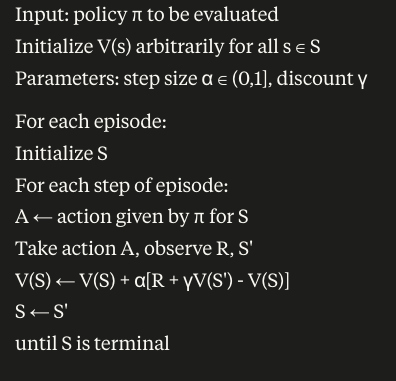

### Why TD Methods Bootstrap

**From Bellman equation** (_Equations 6.3-6.4_):
$$v_\pi(s) = \mathbb{E}_\pi[G_t | S_t = s]$$
$$= \mathbb{E}_\pi[R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s]$$

**TD target relationship**: TD methods sample the expectation and use current estimates in place of true values.

### TD Error as Sum of Future TD Errors

**Important identity** (_Equation 6.6_):
$$G_t - V(S_t) = \sum_{k=t}^{T-1} \gamma^{k-t}\delta_k$$

**Intuition**: The Monte Carlo error equals the sum of all future TD errors (discounted). This shows the deep connection between TD and MC methods.

---

## 6.2 Advantages of TD Prediction Methods

**TD advantages over Monte Carlo**:
1. **Online learning**: Can learn before episodes end
2. **Continuing tasks**: Works without episodes
3. **Lower variance**: Updates have less variability than MC

**TD advantages over DP**:
1. **Model-free**: No need for environment dynamics
2. **Samples experience**: Works with real interactions

**Convergence guarantee**: TD(0) converges to $v_\pi$ under standard stochastic approximation conditions.

### Example 6.2: Random Walk

![Random Walk Task](../img/fig6_2.png)

**Task**: 5 states in a row, start at center, move left/right randomly, +1 reward at right terminal.

**Result**: TD consistently outperforms MC in terms of RMS error, especially early in learning.

---

## 6.3 Optimality of TD(0)

**Batch updating**: Process all experience repeatedly until convergence.

**Key finding**: Under batch updating:
- **Monte Carlo**: Finds estimates minimizing mean-squared error on training data
- **TD(0)**: Finds maximum-likelihood estimate of Markov process

**Certainty-equivalence estimate**: TD(0) computes the value function that would be exactly correct if the maximum-likelihood model were exactly correct.

**Intuition**: TD methods implicitly build a model of the Markov process and compute values for that model, explaining their efficiency advantage.

---

## 6.4 Sarsa: On-Policy TD Control

**Core idea**: Learn action-values $q_\pi(s,a)$ instead of state-values, using TD methods.

**🏆 FOUNDATIONAL FORMULA - Sarsa update** (_Equation 6.7_):
$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]$$

**Name origin**: Uses quintuple $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$ - hence "Sarsa"

### Sarsa Algorithm

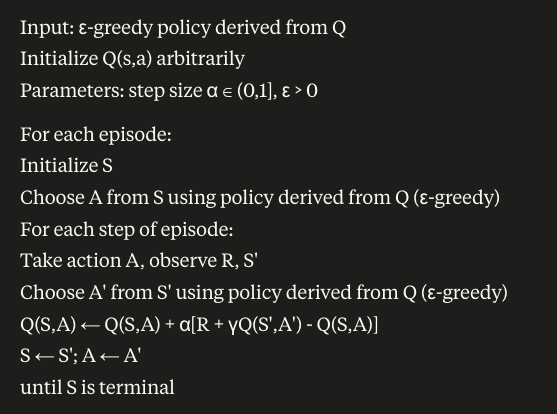

**Key property**: Sarsa is on-policy - it learns about the policy it's actually following (including exploration).

### Example 6.5: Windy Gridworld

![Windy Gridworld](../img/fig6_3.png)

**Task**: Grid navigation with upward wind in middle columns.

**Result**: Sarsa learns efficient path despite stochastic wind, demonstrating online learning advantage.

---

## 6.5 Q-learning: Off-Policy TD Control

**🏆 FOUNDATIONAL FORMULA - Q-learning update** (_Equation 6.8_):
$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t)]$$

**Key innovation**: Directly learns $q_*$ regardless of policy being followed!

### Q-learning Algorithm

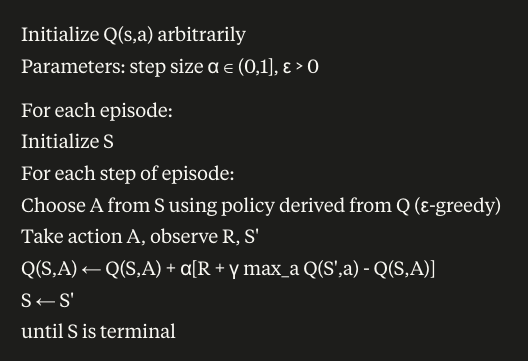

### Off-Policy Nature

**Critical distinction**:
- **Behavior policy**: How we choose actions (e.g., ε-greedy)
- **Target policy**: What we're learning about (greedy w.r.t. Q)

**Q-learning separates these**: Always learns about greedy policy while behaving exploratorily.

### Deep Q-Networks (DQN) - A Modern Extension

**Brief note**: DQN (2015) revolutionized RL by combining Q-learning with deep neural networks:
- Uses neural network to approximate Q-function
- Experience replay: stores and reuses past experiences
- Target network: separate network for stable targets
- Enabled human-level Atari game play

### Example 6.6: Cliff Walking

![Cliff Walking Comparison](../img/fig6_4.png)

**Key insight**: Q-learning learns optimal (risky) path but performs worse online due to exploration. Sarsa learns safer path that accounts for exploration.

---

## 6.6 Expected Sarsa

**Update rule** (_Equation 6.9_):
$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha\left[R_{t+1} + \gamma \sum_a \pi(a|S_{t+1})Q(S_{t+1}, a) - Q(S_t, A_t)\right]$$

**Key insight**: Expected Sarsa moves in the same direction as Sarsa in expectation, but with lower variance.

**Relationship to Q-learning**: When $\pi$ is greedy, Expected Sarsa = Q-learning.

![Backup Diagrams](../img/fig6_5.png)

**Performance**: Generally outperforms both Sarsa and Q-learning, especially with large $\alpha$.

---

## 6.7 Maximization Bias and Double Learning

**Problem**: Using maximum of estimates as estimate of maximum leads to positive bias.

**Example scenario**: Many actions with true value 0, but noisy estimates - max will be positive!

### Double Q-learning

**Key idea**: Use two Q-functions, use one to select actions and other to evaluate.

**Update rules** (_Equation 6.10_):
- With 0.5 probability: $Q_1(S_t, A_t) \leftarrow Q_1(S_t, A_t) + \alpha[R_{t+1} + \gamma Q_2(S_{t+1}, \arg\max_a Q_1(S_{t+1}, a)) - Q_1(S_t, A_t)]$
- Otherwise: Update $Q_2$ symmetrically

### Double Q-learning Algorithm

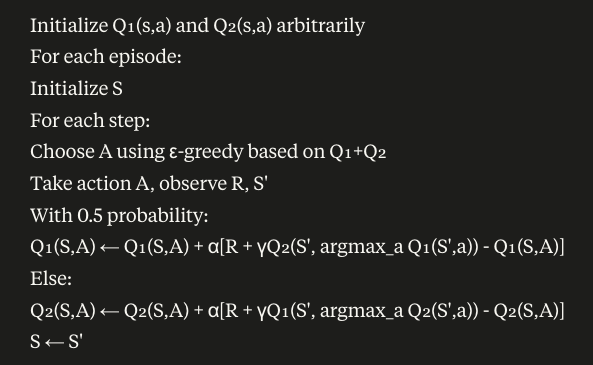

![Maximization Bias Example](../img/fig6_6.png)

---

## 6.8 Games, Afterstates, and Other Special Cases

**Afterstates**: States after agent's move but before environment's response.

**Example**: In tic-tac-toe, board position after your move but before opponent's.

**Advantage**: Many state-action pairs may lead to same afterstate - more efficient learning.

**When useful**:
- Games (know immediate effect of moves)
- Queuing problems (know effect of routing decisions)
- Any domain with known action effects but unknown subsequent dynamics

---

## 6.9 Summary

**TD methods are foundational because they**:
1. Learn online from experience
2. Don't need environment model
3. Bootstrap from other estimates
4. Work for continuing tasks

**Algorithm comparison**:
- **TD(0)**: Basic prediction algorithm
- **Sarsa**: On-policy control (learns about policy being followed)
- **Q-learning**: Off-policy control (learns optimal policy)
- **Expected Sarsa**: Lower variance, can be on- or off-policy
- **Double Q-learning**: Eliminates maximization bias

**Key insight**: TD methods enable efficient online learning by bootstrapping - updating estimates based on other estimates without waiting for final outcomes.

---

## Exercises

### Exercise 6.1
**Q**: If V changes during episode, what must be added to TD error sum to equal MC error?

**A**: Let $V_t$ denote the value function at time $t$. The additional terms are:
$$\sum_{k=t}^{T-1} \gamma^{k-t}[V_{k+1}(S_{k+1}) - V_k(S_{k+1})]$$

These terms account for the changes in value estimates during the episode.

### Exercise 6.2
**Q**: Why might TD be better than MC when moving to new building (same highway entrance)?

**A**: TD can immediately leverage the unchanged parts of the commute (highway onwards). While MC must experience many complete new trajectories, TD updates propagate the unchanged highway-to-home values backward to the new building states immediately. This is faster adaptation through bootstrapping.

### Exercise 6.3
**Q**: What does first episode of random walk tell us if only V(A) changed?

**A**: The episode went: Center → B → A → terminal-left. Only V(A) changed because TD only updates states actually visited. The update was V(A) ← 0.5 + 0.5[0 + 0 - 0.5] = 0.25, a decrease of 0.25.

### Exercise 6.4
**Q**: Would different α values change which algorithm is better?

**A**: The relative advantage of TD over MC is fairly robust across α values. Very small α would make both slow. Very large α would make both unstable, though TD might suffer more due to bootstrapping on changing estimates. The qualitative advantage of TD remains.

### Exercise 6.5
**Q**: Why does TD RMS error go up at high α?

**A**: At high α, TD updates cause large changes to value estimates. Since TD bootstraps, these volatile estimates propagate errors through the value function. The "down then up" pattern occurs because initial learning reduces error, but continued large updates prevent convergence, causing estimates to oscillate.

### Exercise 6.6
**Q**: Two ways to compute true values for random walk?

**A**: 
1. **Solve Bellman equations**: Set up system v(B) = 0.5v(A) + 0.5v(C), etc., and solve
2. **First-visit probabilities**: Calculate probability of reaching right terminal before left from each state

We probably used method 2 (simpler calculation).

### Exercise 6.7
**Q**: Off-policy TD(0) with importance sampling?

**A**: 
$$V(S_t) \leftarrow V(S_t) + \alpha \rho_{t:t} [R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

where $\rho_{t:t} = \frac{\pi(A_t|S_t)}{b(A_t|S_t)}$ is the single-step importance sampling ratio.

### Exercise 6.8
**Q**: Show action-value version of TD error sum identity?

**A**: Starting from $G_t - Q(S_t, A_t)$ and recursively expanding:
$$G_t - Q(S_t, A_t) = \sum_{k=t}^{T-1} \gamma^{k-t}\delta_k$$

where $\delta_k = R_{k+1} + \gamma Q(S_{k+1}, A_{k+1}) - Q(S_k, A_k)$

### Exercise 6.9
**Q**: Windy gridworld with King's moves (8 actions)?

**A**: With diagonal moves, the agent can reach the goal more efficiently by moving diagonally when beneficial. Typical improvement: ~15 steps → ~10-12 steps. A 9th "stay" action helps in strong wind columns where the agent might want to wait for better positioning.

### Exercise 6.10
**Q**: Stochastic wind version?

**A**: With stochastic wind (±1 from mean), Sarsa will learn even more conservative paths to avoid risk of being blown into bad positions. The optimal path likely shifts further from the wind columns, trading distance for safety.

### Exercise 6.11
**Q**: Why is Q-learning off-policy?

**A**: Q-learning learns about the greedy policy (target policy) while following an exploratory policy like ε-greedy (behavior policy). The max operation in the update always assumes greedy action selection, regardless of how actions are actually chosen.

### Exercise 6.12
**Q**: If action selection is greedy, are Sarsa and Q-learning identical?

**A**: Yes, if action selection is purely greedy (no exploration), then $A_{t+1} = \arg\max_a Q(S_{t+1}, a)$, making the updates identical. However, this would eliminate exploration, likely preventing convergence to optimal values.

### Exercise 6.13
**Q**: Double Expected Sarsa update equations?

**A**: With probability 0.5:
$$Q_1(S_t, A_t) \leftarrow Q_1(S_t, A_t) + \alpha\left[R_{t+1} + \gamma \sum_a \pi(a|S_{t+1})Q_2(S_{t+1}, a) - Q_1(S_t, A_t)\right]$$

Otherwise update $Q_2$ using $Q_1$ for the expectation.

### Exercise 6.14
**Q**: Jack's Car Rental with afterstates?

**A**: Afterstates would be the number of cars at each location after moving cars but before rentals/returns. This is more efficient because many different starting states and actions lead to the same afterstate (e.g., (12,8) move 2 → (10,10) same as (11,9) move 1 → (10,10)). This reduces the effective state-action space significantly.

# Appendix A: Full Notation
---

### General Notation

> Capital letters are used for random variables.

> Lower case letters are used for the values of random variables and for scalar functions.

> Quantities that are required to be real-valued vectors are written in bold and in lower case (even if random variables). 

> Matrices are bold capitals.

| Symbol | Meaning |
|--------|---------|
| **Standard Operators** |  |
| $\doteq$ | Equality relationship that is true by definition |
| $\approx$ | Approximately equal |
| $\propto$ | Proportional to |
| $\Pr\{X = x\}$ | Probability that random variable $X$ takes value $x$ |
| $X \sim p$ | $X$ drawn from distribution $p$ |
| $\mathbb{E}[X]$ | Expectation of random variable $X$ |
| $\arg\max_a f(a)$ | Value of $a$ that maximizes $f(a)$ |
| $\ln x$ | Natural logarithm of $x$ |
| $e^x$, $\exp(x)$ | The base of the natural logarithm, $e \approx 2.71828$, carried to power $x$ |
| $\mathbb{R}$ | Set of real numbers |
| $f: \mathcal{X} \to \mathcal{Y}$ | Function from elements of set $\mathcal{X}$ to elements of set $\mathcal{Y}$ |
| $\leftarrow$ | Assignment |
| $(a, b]$ | Real interval between $a$ and $b$ including $b$ but not $a$ |
| **Standard RL Algorithm Parameters** |  |
| $\epsilon$ | Probability of taking a random action in an $\epsilon$-greedy policy |
| $\alpha, \beta$ | Step-size parameters |
| $\gamma$ | Discount-rate parameter |
| $\lambda$ | Decay-rate parameter for eligibility traces |
| $\mathbf{1}_\text{predicate}$ | Indicator function (1 if predicate is true, else 0) |

---

### Multi-Armed Bandit Notation

| Symbol | Meaning |
|--------|---------|
| $k$ | Number of actions (arms) |
| $t$ | Discrete time step or play number |
| $q_*(a)$ | True value (expected reward) of action $a$ |
| $Q_t(a)$ | Estimate at time $t$ of $q_*(a)$ |
| $N_t(a)$ | Number of times action $a$ has been selected up to time $t$ |
| $H_t(a)$ | Learned preference for selecting action $a$ at time $t$ |
| $\pi_t(a)$ | Probability of selecting action $a$ at time $t$ |
| $\bar{R}_t$ | Estimate at time $t$ of the expected reward given $\pi_t$ |

---

### Markov Decision Process Notation

| Symbol | Meaning |
|--------|---------|
| **State & Action Sets** |  |
| $s, s'$ | States |
| $a$ | An action |
| $r$ | A reward |
| $\mathcal{S}$ | Set of all nonterminal states |
| $\mathcal{S}^+$ | Set of all states, incl. terminal state |
| $\mathcal{A}(s)$ | Set of all actions available in state $s$ |
| $\mathcal{R}$ | Set of all possible rewards, a finite subset of $\mathbb{R}$ |
| $\mathcal{C}$ | Subset of (e.g., $\mathcal{R} \subset \mathbb{R}$) |
| $\in$ | Is an element of (e.g. $s \in \mathcal{S}$, $r \in \mathcal{R}$) |
| $\lvert\mathcal{S}\rvert$ | Number of elements in set $\mathcal{S}$ |
| **Time & Policy** |  |
| $t$ | Discrete time step |
| $T, T(t)$ | Final time step of episode, or including $t$ |
| $A_t$ | Action at time $t$ |
| $S_t$ | State at time $t$ |
| $R_t$ | Reward at time $t$ |
| $\pi$ | Policy (decision-making rule) |
| $\pi(s)$ | Action taken in state $s$ under deterministic $\pi$ |
| $\pi(a \mid s)$ | Probability of taking action $a$ in state $s$ under stochastic $\pi$ |
| **Returns** |  |
| $G_t$ | Return following time $t$ |
| $h$ | Horizon (timestep looked up to in forward view) |
| $G_{t:t+n}, G_{t:h}$ | $n$-step return from $t+1$ to $t+n$ or $h$ (discounted/corrected) |
| $G_{t:h}$ | Flat return (undiscounted/unadjusted) from $t+1$ to $h$ |
| $G^\lambda_t$ | $\lambda$-return |
| $G^{\wedge}_t$, $G^{\wedge a}_t$ | Truncated, corrected $\lambda$-return |
| **Transition & Reward Probabilities** |  |
| $p(s', r \mid s, a)$ | Probability of transition to $s'$ with reward $r$ from $s, a$ |
| $p(s' \mid s, a)$ | Probability of transition to $s'$ from $s$ taking $a$ |
| $r(s, a)$ | Expected immediate reward from $s$ after $a$ |
| $r(s, a, s')$ | Expected reward on transition $s \to s'$ under $a$ |
| **Value Functions** |  |
| $v_\pi(s)$ | Value of $s$ under policy $\pi$ (expected return) |
| $v_*(s)$ | Value of $s$ under optimal policy |
| $q_\pi(s, a)$ | Value of taking $a$ in $s$ under $\pi$ |
| $q_*(s, a)$ | Value of taking $a$ in $s$ under optimal policy |
| **Estimators & TD Error** |  |
| $V, V_t$ | Array estimates of $v_\pi$ or $v_*$ |
| $Q, Q_t$ | Array estimates of $q_\pi$ or $q_*$ |
| $\hat{V}(s)$ | Expected approximate action value; e.g. $\hat{V}_t(s) \doteq \sum_a \pi(a|s) Q_t(s, a)$ |
| $U_t$ | Target for estimate at time $t$ |
| $\delta_t$ | Temporal-difference (TD) error at $t$ (a random variable) |
| $\delta_t^s$, $\delta_t^a$ | State- and action-specific forms of TD error |
| $n$ | In $n$-step methods, $n$ is number of steps of bootstrapping |
---

### Function Approximation, Policy Gradient, Advanced Notation

| Symbol | Meaning |
|--------|---------|
| **Weight & Parameter Notation** |  |
| $d$ | Dimensionality—number of components of $\mathbf{w}$ |
| $d'$ | Alternate dimensionality—number of components of $\theta$ |
| $\mathbf{w}, \mathbf{w}_t$ | $d$-vector of weights underlying approximate value function |
| $w_i, w_{t,i}$ | $i$-th component of learnable weight vector |
| $\hat{v}(s, \mathbf{w})$ | Approximate value of $s$ given $\mathbf{w}$ |
| $v_\mathbf{w}(s)$ | Alternate notation for $\hat{v}(s, \mathbf{w})$ |
| $\hat{q}(s, a, \mathbf{w})$ | Approximate value of $(s, a)$ given $\mathbf{w}$ |
| $\nabla \hat{v}(s, \mathbf{w})$ | Column vector of partial derivatives w.r.t. $\mathbf{w}$ |
| $\nabla \hat{q}(s, a, \mathbf{w})$ | Column vector of partial derivatives w.r.t. $\mathbf{w}$ |
| **Feature Vectors & Eligibility Traces** |  |
| $\mathbf{x}(s)$ | Feature vector visible in $s$ |
| $\mathbf{x}(s, a)$ | Feature vector visible in $s$ taking $a$ |
| $x_i(s), x_i(s, a)$ | $i$-th component of $\mathbf{x}(s)$ or $\mathbf{x}(s, a)$ |
| $\mathbf{x}_t$ | Shorthand for $\mathbf{x}(S_t)$ or $\mathbf{x}(S_t, A_t)$ |
| $\mathbf{w}^\top \mathbf{x}$ | Inner product of vectors |
| $\mathbf{v}, \mathbf{v}_t$ | Secondary $d$-vector of weights, used to learn $\mathbf{w}$ |
| $\mathbf{z}_t$ | $d$-vector of eligibility traces at $t$ |
| **Policy Gradient Notation** |  |
| $\theta, \theta_t$ | Parameter vector of target policy |
| $\pi(a \mid s, \theta)$ | Probability of taking $a$ in $s$ given $\theta$ |
| $\pi_\theta$ | Policy corresponding to parameter $\theta$ |
| $\nabla \pi(a \mid s, \theta)$ | Partial derivatives of $\pi(a \mid s, \theta)$ w.r.t. $\theta$ |
| $J(\theta)$ | Performance measure for policy $\pi_\theta$ |
| $\nabla J(\theta)$ | Partial derivatives of $J(\theta)$ w.r.t. $\theta$ |
| $h(s, a, \theta)$ | Preference for $a$ in $s$ based on $\theta$ |
| **Behavior Policy, Baselines, Importance Sampling** |  |
| $b(a \mid s)$ | Behavior policy used to select actions while learning target $\pi$ |
| $b(s)$ | Baseline function $b: \mathcal{S} \to \mathbb{R}$ for policy-gradient methods |
| $b$ | Branching factor for MDP/search tree |
| $\rho_{t:h}$ | Importance sampling ratio for $t$ through $h$ |
| $\rho_t$ | Importance sampling ratio for time $t$ alone, $\rho_t \doteq \rho_{t:t}$ |
| $r(\pi)$ | Average reward (reward rate) for policy $\pi$ |
| $\bar{R}_t$ | Estimate of $r(\pi)$ at time $t$ |
| **State Distributions & Operators** |  |
| $\mu(s)$ | On-policy distribution over states |
| $\mu$ | $\lvert\mathcal{S}\rvert$-vector of the $\mu(s)$ for $s \in \mathcal{S}$ |
| $\|v\|^2_\mu$ | $\mu$-weighted squared norm of $v$, i.e., $\|v\|^2_\mu \doteq \sum_{s \in \mathcal{S}} \mu(s)v(s)^2$ |
| $\eta(s)$ | Expected number of visits to $s$ per episode |
| $\Pi$ | Projection operator for value functions |
| $B_\pi$ | Bellman operator for value functions |

---

### Matrices, Bellman Error, & Error Metrics

| Symbol | Meaning |
|--------|---------|
| **Matrix Notation & Linear Algebra** |  |
| $\mathbf{A}$ | $d \times d$ matrix: $\mathbf{A} \doteq \mathbb{E}\left[ \mathbf{x}_t(\mathbf{x}_t - \gamma \mathbf{x}_{t+1})^\top \right]$ |
| $\mathbf{b}$ | $d$-dimensional vector: $\mathbf{b} \doteq \mathbb{E}[R_{t+1} \mathbf{x}_t]$ |
| $\mathbf{w}_{TD}$ | TD fixed point: $\mathbf{w}_{TD} \doteq \mathbf{A}^{-1}\mathbf{b}$ |
| $\mathbf{I}$ | Identity matrix |
| $\mathbf{P}$ | $\lvert\mathcal{S}\rvert \times \lvert\mathcal{S}\rvert$ matrix of state-transition probabilities under $\pi$ |
| $\mathbf{D}$ | $\lvert\mathcal{S}\rvert \times \lvert\mathcal{S}\rvert$ diagonal matrix with $\mu$ on its diagonal |
| $\mathbf{X}$ | $\lvert\mathcal{S}\rvert \times d$ matrix with the $\mathbf{x}(s)$ as its rows |
| **Bellman Error & Value Error Metrics** |  |
| $\bar{\delta}_\mathbf{w}(s)$ | Bellman error (expected TD error) for $v_\mathbf{w}$ at $s$ |
| $\bar{\delta}_\mathbf{w}$, BE | Bellman error vector (with components $\bar{\delta}_\mathbf{w}(s)$) |
| $\text{VE}(\mathbf{w})$ | Mean square value error: $\text{VE}(\mathbf{w}) \doteq \|v_\mathbf{w} - v_\pi\|^2_\mu$ |
| $\text{BE}(\mathbf{w})$ | Mean square Bellman error: $\text{BE}(\mathbf{w}) \doteq \|\bar{\delta}_\mathbf{w}\|^2_\mu$ |
| $\text{PBE}(\mathbf{w})$ | Mean square projected Bellman error: $\text{PBE}(\mathbf{w}) \doteq \|\Pi \bar{\delta}_\mathbf{w}\|^2_\mu$ |
| $\text{TDE}(\mathbf{w})$ | Mean square temporal-difference error: $\text{TDE}(\mathbf{w}) \doteq \mathbb{E}_b[\rho_t \delta_t^2]$ |
| $\text{RE}(\mathbf{w})$ | Mean square return error |